# <u>Métodos Supervisados para Regresión - Introducción</u>

## Introducción
El modelo de regresión lineal es el primer modelo que vamos a usar en este entrenamiento. Este modelo puede ser usado para diferentes enfoques, sin embargo si lo hacemos con la teorica estadistica clásica encontramos que es una gran herramienta debido a su interpretabilidad y capacidad de hacer inferencia estadística.

## Objetivos
*   Entender el enfoque clásico de la regresión lineal
*   Hacer pruebas de hipotesis para significancia individual de paramtros
*   Usar la regresión lineal como herramienta para evaluar la significancia de una variable de interés

Primero importamos algunas librerías para nuestro trabajo:

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
#import sklearn

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

## Lectura de archivos

Para este ejemplo usaremos las ventas anuales de cafeterias en Canadá con el fin de predecir las ventas de cada una en función de sus características.

In [2]:
df_ventas = pd.read_csv('VentasCaf.csv')

In [3]:
df_ventas = df_ventas.drop("Unnamed: 0",axis=1)

In [4]:
df_ventas.head()

,area,publicidad_exterior,num_productos,delivery,ventas
0,52.324250,0,28.717111,1,83188
1,53.972180,0,24.061171,1,68638
2,53.231438,0,16.724146,1,84210
3,43.583231,0,29.307826,1,82888
4,36.769380,0,18.313163,0,57796


In [5]:
df_ventas.shape

(1116, 5)

In [6]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 1116 non-null   float64
 1   publicidad_exterior  1116 non-null   int64  
 2   num_productos        1116 non-null   float64
 3   delivery             1116 non-null   int64  
 4   ventas               1116 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 43.7 KB


In [7]:
df_ventas.corr()

,area,publicidad_exterior,num_productos,delivery,ventas
area,1.000000,-0.081763,0.287728,0.263135,0.546376
publicidad_exterior,-0.081763,1.000000,0.045441,-0.005899,0.067203
num_productos,0.287728,0.045441,1.000000,0.020919,0.625677
delivery,0.263135,-0.005899,0.020919,1.000000,0.293886
ventas,0.546376,0.067203,0.625677,0.293886,1.000000


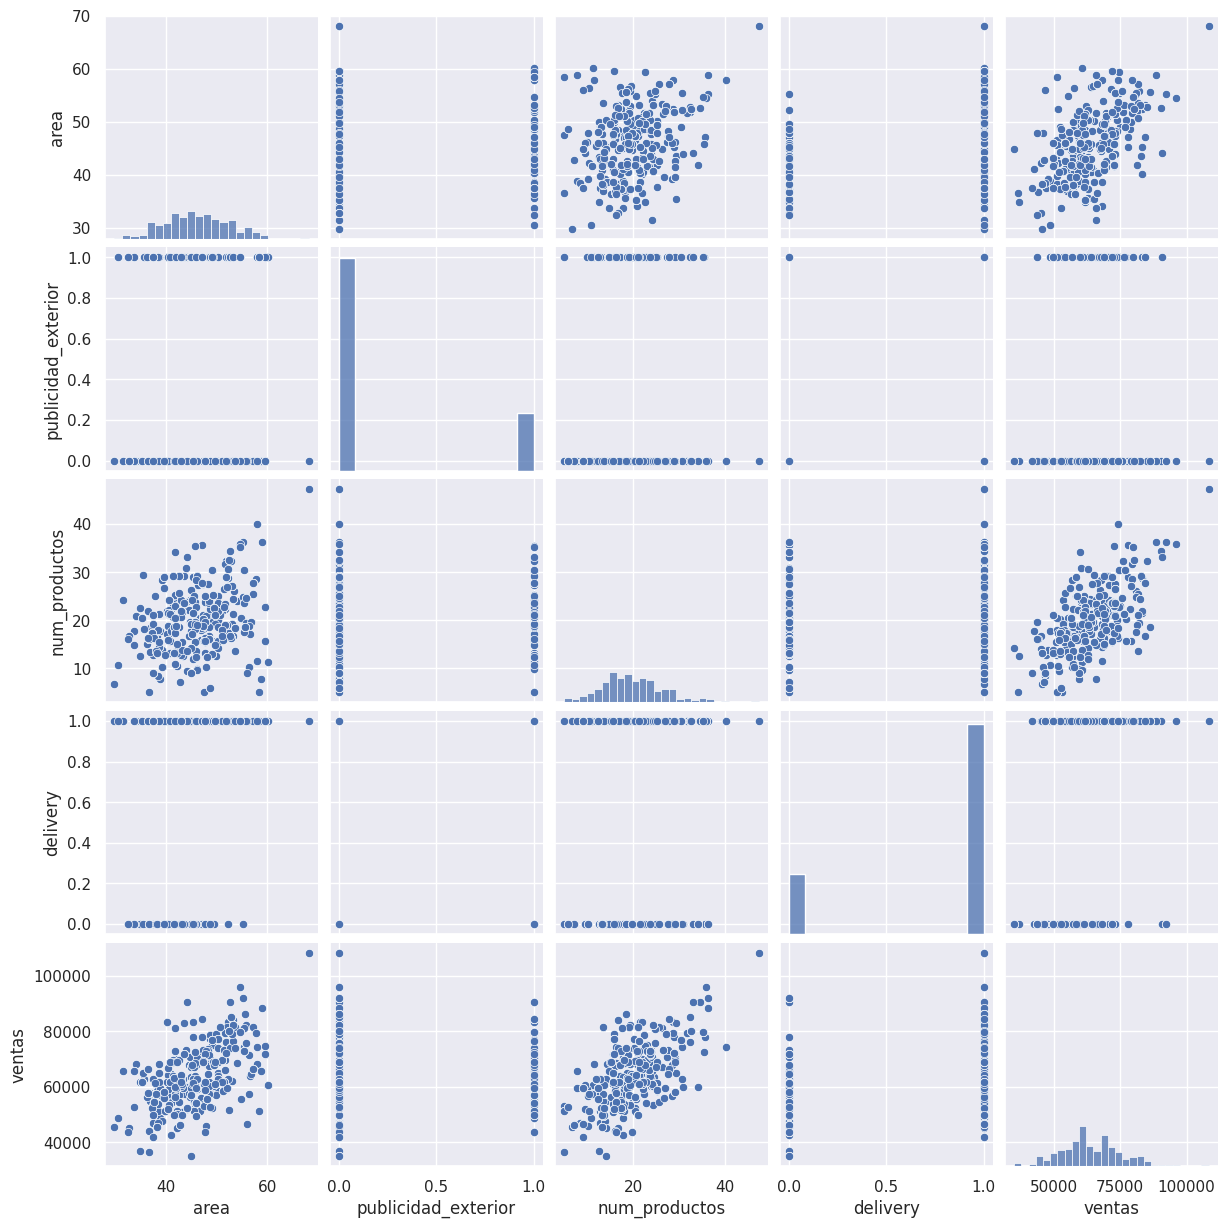

In [8]:
sns.pairplot(df_ventas)
plt.show()

In [9]:
target = 'ventas'

### División en train y test

La función `train_test_split` nos permite dividir la data de forma aleatoria en conjuntos de entrenamiento y prueba para poder entrenar nuestro modelo

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_train, df_test = train_test_split(df_ventas, test_size = 0.20, random_state = 12345)

In [15]:
df_train.shape

(892, 5)

In [16]:
df_test.shape

(224, 5)

In [17]:
df_train.head()

,area,publicidad_exterior,num_productos,delivery,ventas
347,56.335615,0,10.309946,1,57517
239,47.139205,0,35.654891,0,78078
663,51.929088,0,28.919572,1,72003
1061,58.363489,1,5.000000,1,51163
268,55.832478,0,19.371440,1,82201


In [18]:
df_test.head()

,area,publicidad_exterior,num_productos,delivery,ventas
624,48.130975,0,12.388877,1,55648
923,45.721896,1,35.458015,1,72531
469,45.596277,0,17.938683,1,51142
104,41.650478,1,18.601108,1,63160
687,34.162867,0,20.832900,1,68069


In [19]:
X_train = df_train.drop(target, axis = 1)
y_train = df_train[target]

In [20]:
X_test = df_test.drop(target, axis = 1)
y_test = df_test[target]

In [21]:
X_train.shape, y_train.shape

((892, 4), (892,))

In [22]:
X_test.shape, y_test.shape

((224, 4), (224,))

## 1. Regresión lineal simple

Elegimos una variable que tenga una relación aparentemente lineal con el target

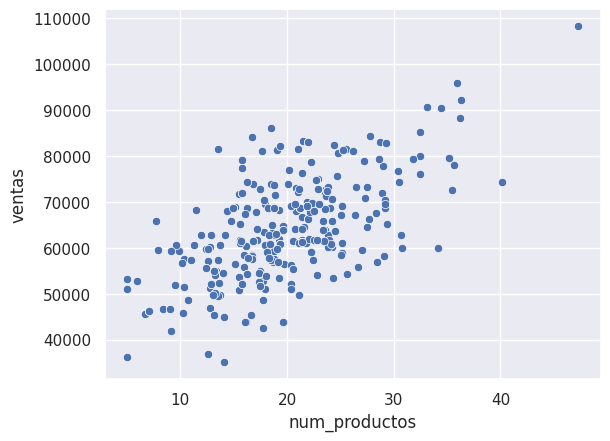

In [23]:
sns.scatterplot(data = df_train, x = "num_productos", y = target)
plt.show()

In [24]:
df_train[['num_productos', target]].corr()

,num_productos,ventas
num_productos,1.000000,0.615954
ventas,0.615954,1.000000


### Estimación del modelo de regresión
Ahora queremos validar si podemos crear un modelo que permita predecir las ventas de cada cafetería a partir de sus caracteristicas. Para el modelo lineal simple tenemos:

$$
ventas = \beta_0 + \beta_1    *  num\_productos
$$


Importamos el modelo utilizando la librería `scikit-learn`

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()  # definimos el modelo

In [27]:
lr.fit(df_train[['num_productos']], y_train.values)   # el ajuste de la recta de regresión

LinearRegression()

In [28]:
lr.coef_

array([1018.35645795])

In [29]:
lr.intercept_

43614.95997309759

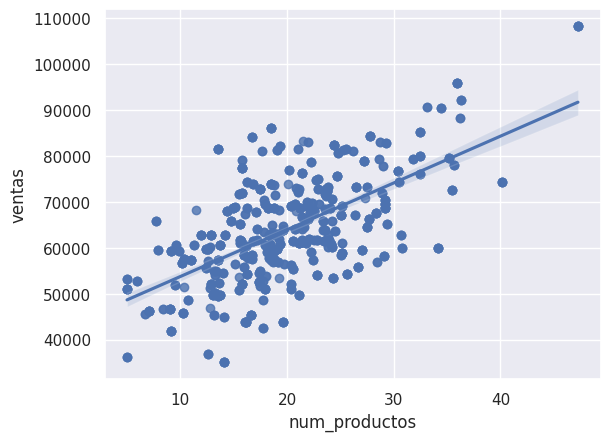

In [30]:
sns.regplot(x='num_productos', y='ventas', data=df_train)
plt.show()

### Evaluación de regresión con MSE y RMSE

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

obtenemos las predicciones del modelo para poder evaluarlas respecto a el target original

In [32]:
y_train_pred = lr.predict(X_train[['num_productos']])
y_test_pred = lr.predict(X_test[['num_productos']])

In [33]:
print('MSE train:', mean_squared_error(y_train, y_train_pred))
print('MSE test:', mean_squared_error(y_test, y_test_pred))

MSE train: 81658867.68379937
MSE test: 73599282.73269653


In [34]:
print('RMSE train:', mean_squared_error(y_train, y_train_pred) ** 0.5)
print('RMSE test:', mean_squared_error(y_test, y_test_pred) ** 0.5)

RMSE train: 9036.529626123038
RMSE test: 8579.002432258458


In [35]:
print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

R2 train: 0.37939875624310937
R2 test: 0.43891143281935896


## 2. Regresión Múltiple

Utilizamos todas las variables para la predicción:

$$
ventas = \beta_0 + \beta_1 * area + \beta_2 *   publicidad\_ext + \beta_3    *  num\_productos + \beta_4 *  delivery
$$


In [36]:
X_train.head()

,area,publicidad_exterior,num_productos,delivery
347,56.335615,0,10.309946,1
239,47.139205,0,35.654891,0
663,51.929088,0,28.919572,1
1061,58.363489,1,5.000000,1
268,55.832478,0,19.371440,1


In [37]:
y_train.head()

347     57517
239     78078
663     72003
1061    51163
268     82201
Name: ventas, dtype: int64

In [38]:
lr_multiple = LinearRegression()

In [39]:
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [40]:
y_train_pred = lr_multiple.predict(X_train)
y_test_pred = lr_multiple.predict(X_test)

In [41]:
print('RMSE train:', mean_squared_error(y_train, y_train_pred) ** 0.5)
print('RMSE test:', mean_squared_error(y_test, y_test_pred) ** 0.5)

RMSE train: 7479.361493567244
RMSE test: 7371.665628469043


In [42]:
print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

R2 train: 0.5748537660580724
R2 test: 0.5857246496339756


betas de la regresión

In [43]:
betas = pd.DataFrame({'features': X_train.columns, 'beta': lr_multiple.coef_})
betas

,features,beta
0,area,621.632381
1,publicidad_exterior,2014.182691
2,num_productos,845.239628
3,delivery,5694.536244
